In [1]:
!pip install clickhouse-connect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.6/977.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.7 MB/s eta 0:00:00


In [2]:
import clickhouse_connect
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [5]:
client = clickhouse_connect.get_client(host='play.clickhouse.com',
                                       user='play',
                                       password='',
                                       port=443,
                                       connect_timeout=15)

In [6]:
client

In [7]:
client.query('SHOW TABLES').result_rows

[('actors',),
 ('all_replicas_metric_log',),
 ('benchmark_results',),
 ('benchmark_runs',),
 ('cell_towers',),
 ('checks',),
 ('cisco_umbrella',),
 ('covid',),
 ('dish',),
 ('dns',),
 ('dns2',),
 ('food_facts',),
 ('github_events',),
 ('hackernews',),
 ('hackernews_changes_items',),
 ('hackernews_changes_profiles',),
 ('hackernews_history',),
 ('hackernews_top',),
 ('hits',),
 ('lineorder',),
 ('loc_stats',),
 ('menu',),
 ('menu_item',),
 ('menu_item_denorm',),
 ('menu_page',),
 ('minicrawl',),
 ('newswire',),
 ('ontime',),
 ('opensky',),
 ('pypi',),
 ('query_metrics_v2',),
 ('rdns',),
 ('recipes',),
 ('repos',),
 ('repos_raw',),
 ('run_attributes_v1',),
 ('search_clickhouse_stackoverflow',),
 ('search_stackoverflow',),
 ('stackoverflow',),
 ('stock',),
 ('tranco',),
 ('trips',),
 ('uk_price_paid',),
 ('uk_price_paid_updater',),
 ('wikistat',),
 ('workflow_jobs',)]

In [11]:
client.query_df('SELECT * FROM stock')

,symbol,date,price,volume,open,low,high
0,A,1999-11-18,42.750,44733600,45.500,40.000,50.000
1,A,1999-11-19,40.750,10896900,42.937,39.812,43.000
2,A,1999-11-22,43.625,4705100,41.312,40.062,43.625
3,A,1999-11-23,40.250,4274300,42.500,40.250,43.630
4,A,1999-11-24,41.060,3464400,40.130,40.000,41.940
...,...,...,...,...,...,...,...
32763,AAPL,1993-06-15,42.000,4002800,45.250,41.880,45.250
32764,AAPL,1993-06-16,42.250,3152500,42.250,41.500,43.250
32765,AAPL,1993-06-17,41.250,3655700,42.500,40.500,42.500
32766,AAPL,1993-06-18,41.000,2779400,41.630,39.750,42.130


In [12]:
parameters = {'stock_name': 'NVDA'}
client.query_df('SELECT * FROM stock WHERE symbol LIKE {stock_name:String}',
                parameters=parameters)

,symbol,date,price,volume,open,low,high
0,NVDA,1999-01-22,19.687,5655600,21.000,18.625,23.437
1,NVDA,1999-01-25,21.750,1063500,21.250,19.687,22.000
2,NVDA,1999-01-26,20.062,715000,22.000,19.750,22.437
3,NVDA,1999-01-27,20.000,509100,20.125,19.000,20.625
4,NVDA,1999-01-28,19.937,474000,20.000,19.812,20.125
...,...,...,...,...,...,...,...
1986,NVDA,2006-12-22,37.030,6169600,37.870,36.850,38.000
1987,NVDA,2006-12-26,37.020,3803900,37.230,36.870,37.560
1988,NVDA,2006-12-27,37.510,4416000,37.180,37.180,37.640
1989,NVDA,2006-12-28,37.240,3567400,37.550,37.070,37.590


In [ ]:
client.query_df('''SELECT MIN(date) AS min_date, MAX(date) AS max_date
                    FROM stock
                    WHERE symbol LIKE {stock_name:String}''',
                parameters=parameters)

,min_date,max_date
0,1999-01-22,2006-12-29


In [13]:
parameters = {
    'stock_name': 'NVDA',
    'date_from': datetime.date(2004, 1, 1),
    'date_to': datetime.date(2004, 12, 31)
}
nvda_prices = client.query_df('''SELECT date, price FROM stock
                                WHERE symbol LIKE {stock_name:String}
                                    AND date BETWEEN {date_from:DateTime} AND {date_to:DateTime}''',
                              parameters=parameters)
nvda_prices

,date,price
0,2004-01-02,23.080
1,2004-01-05,23.830
2,2004-01-06,24.800
3,2004-01-07,25.020
4,2004-01-08,25.110
...,...,...
247,2004-12-27,22.870
248,2004-12-28,22.750
249,2004-12-29,22.950
250,2004-12-30,22.860


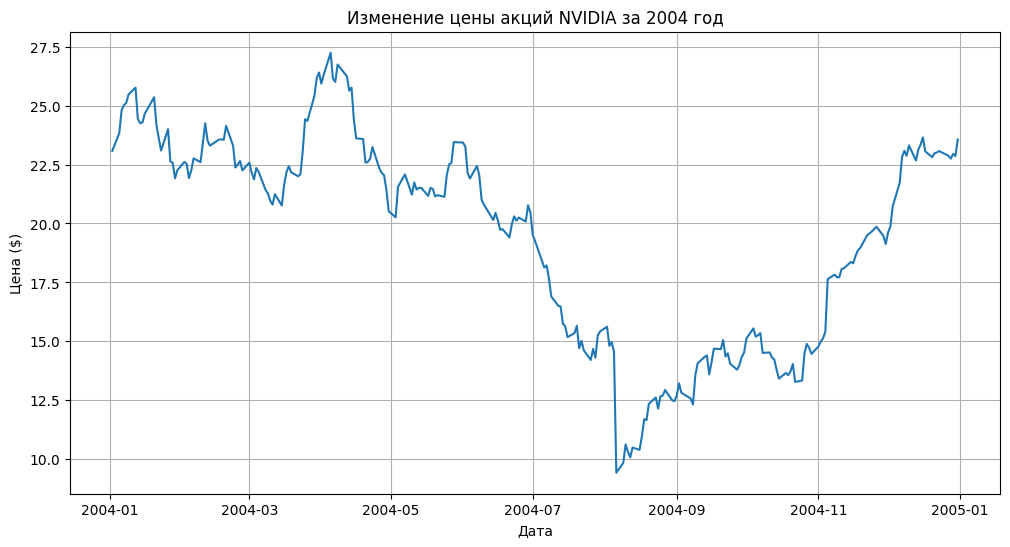

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(nvda_prices['date'], nvda_prices['price'])
plt.xlabel('Дата')
plt.ylabel('Цена ($)')
plt.title('Изменение цены акций NVIDIA за 2004 год')
plt.grid(True)
plt.show()

In [20]:
parameters = {
    'stock_name': 'NVDA',
    'date_from': datetime.date(2004, 1, 1),
    'date_to': datetime.date(2004, 12, 31)
}
nvda_volumes = client.query_df('''SELECT toMonth(date) AS trade_month, AVG(volume) AS average_volume
                                FROM stock
                                WHERE symbol LIKE {stock_name:String}
                                    AND date BETWEEN {date_from:DateTime} AND {date_to:DateTime}
                                GROUP BY trade_month''',
                              parameters=parameters)
nvda_volumes

,trade_month,average_volume
0,1,5.174580e+06
1,2,5.216421e+06
2,3,4.783287e+06
3,4,4.907019e+06
4,5,4.296365e+06
5,6,3.808748e+06
6,7,4.662443e+06
7,8,8.584082e+06
8,9,6.206857e+06
9,10,6.499333e+06


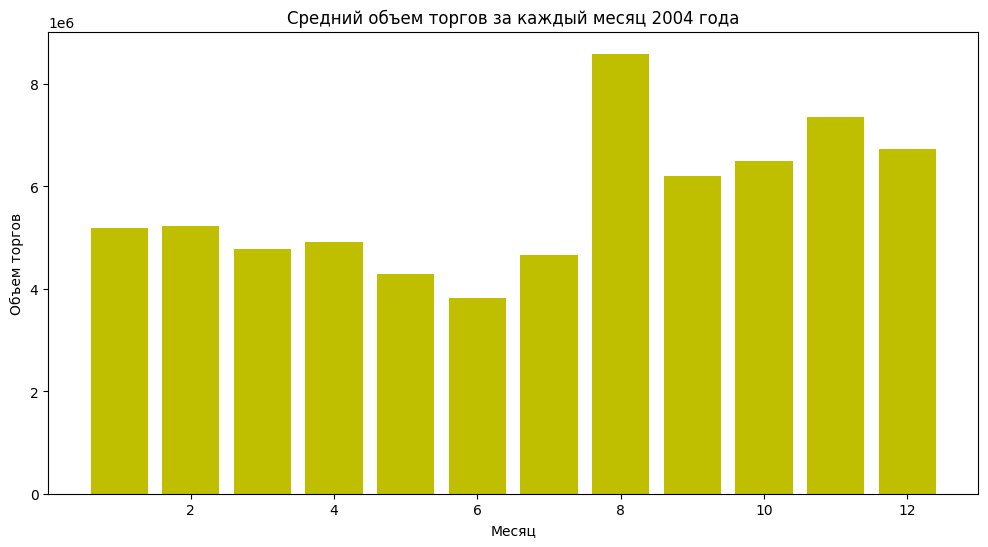

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(nvda_volumes['trade_month'], nvda_volumes['average_volume'], color='y')
plt.xlabel('Месяц')
plt.ylabel('Объем торгов')
plt.title('Средний объем торгов за каждый месяц 2004 года')
plt.show()